# #009 - Calculate Portfolio Metrics

In this code, we'll calculate some metrics as Sharpe Ratio complementing #006, start resuming some functions already defined in prior sections <p>
Then, once obatined DF with metrics, shall proceed to Monte Carlo in next code;

## libs

In [1]:
#import Libraries
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np

## Functions

In [2]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

In [3]:
#Define a function that performs an Asset Allocation
def asset_allocation(df, initial_investment, weights):
    ''' Performs an asset Allocation for a given DF, initial investment value and weights'''
    
    portfolio_df = df.copy()
    
    # Scale stock prices using the "price_scaling"
    
    scaled_df = df.copy()
    for i in df.columns[0:]:
        scaled_df[i] = df[i]/df[i][0] 
    
    #enumerate method links Stocks tickers in columns along with a counter position weight (i), like an index
    for i, stock in enumerate(scaled_df):
        portfolio_df[stock] = weights[i] * scaled_df[stock]  * initial_investment
    
    # Sum up all values and place the result in a new column titled "portfolio value [$]" 
    portfolio_df['Total Value [$]'] = portfolio_df.sum(axis = 1, numeric_only = True)
    
    # Calculate the portfolio percentage daily return and replace NaNs with zeros
    portfolio_df['Daily Return [%]'] = portfolio_df['Total Value [$]'].pct_change(1) * 100 
    portfolio_df.replace(np.nan, 0, inplace = True)
    
    return portfolio_df

## 9.1 Read and Organize Data

In [4]:
file_name = input('Input the CSV file name: ')
initial_investment = int(input('Input the initial investment: '))
risk_free = float(input('Input the risk free annual rate: ')) # https://ycharts.com/indicators/10_year_treasury_rate 

# risk_free = 0.0390 #used 10YTCMR - https://ycharts.com/indicators/10_year_treasury_rate
# file_name = 'MAG7'
# initial_investment = 1000000

Input the CSV file name: MAG7
Input the initial investment: 1000000
Input the risk free annual rate: 0.039


In [5]:
#read CSV file
Stock_Prices_df = pd.read_csv(file_name)
#The code imports a DataFrame with num index [1,2,3...], this line replace the colum Date to Index
Stock_Prices_df.set_index(['Date'], inplace = True)

In [6]:
#obtain weights vector
n_assets = len(Stock_Prices_df.columns)
#lock vector to test function, can run with random weights
weights = np.ones(n_assets) * 1/n_assets
weights     

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

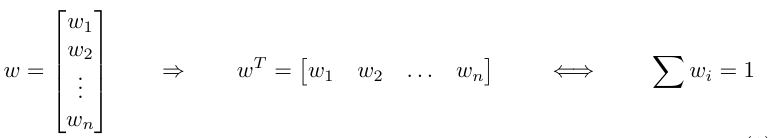

In [7]:
portfolio_df = asset_allocation(Stock_Prices_df, initial_investment, weights)
portfolio_df.round(2)

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA,Total Value [$],Daily Return [%]
Date,,,,,,,,,
2018-12-14,142857.14,142857.14,142857.14,142857.14,142857.14,142857.14,142857.14,1000000.00,0.00
2018-12-17,141527.72,136485.65,139351.86,139019.46,138626.56,140057.56,136103.16,971171.97,-2.88
2018-12-18,143366.51,139228.98,141021.57,142460.49,140081.67,143335.15,131653.88,981148.24,1.03
2018-12-19,138894.71,134167.67,140240.18,132127.49,139704.42,135111.95,130067.93,950314.36,-3.14
2018-12-20,135389.74,131094.09,138375.81,132286.15,136767.23,131785.59,123196.76,928895.36,-2.25
...,...,...,...,...,...,...,...,...,...
2023-12-06,691919.20,259382.95,360343.79,314799.41,523268.68,1789366.03,1402575.00,5341655.05,-1.02
2023-12-07,698934.80,263618.65,379590.66,323863.07,526319.22,1832347.28,1421735.40,5446409.08,1.96
2023-12-08,704115.56,264587.83,374628.16,329971.64,530973.02,1868132.27,1428766.72,5501175.19,1.01


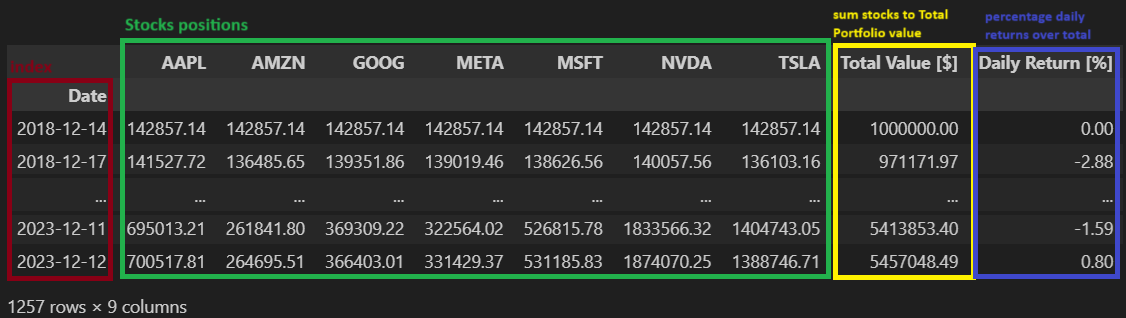

## 9.2 Calcs to Obtain Metrics

In [8]:
 # Daily change of every stock in the portfolio - only for stock positions, so we drop total an daily portfolio return
portfolio_daily_return_df = portfolio_df.drop(columns = ['Total Value [$]', 'Daily Return [%]'])
portfolio_daily_return_df = portfolio_daily_return_df.pct_change(1)
portfolio_daily_return_df.replace(np.nan, 0, inplace = True) 
portfolio_daily_return_df

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2018-12-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-12-17,-0.009306,-0.044600,-0.024537,-0.026864,-0.029614,-0.019597,-0.047278
2018-12-18,0.012992,0.020100,0.011982,0.024752,0.010497,0.023402,-0.032690
2018-12-19,-0.031191,-0.036352,-0.005541,-0.072532,-0.002693,-0.057370,-0.012046
2018-12-20,-0.025235,-0.022908,-0.013294,0.001201,-0.021024,-0.024619,-0.052828
...,...,...,...,...,...,...,...
2023-12-06,-0.005687,-0.016068,-0.007251,-0.002639,-0.009986,-0.022828,0.002723
2023-12-07,0.010139,0.016330,0.053412,0.028792,0.005830,0.024020,0.013661
2023-12-08,0.007412,0.003676,-0.013073,0.018862,0.008842,0.019530,0.004946


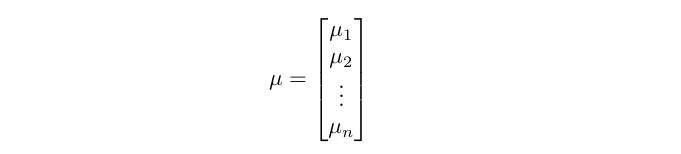

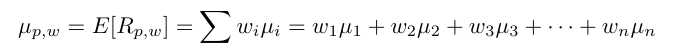

In [9]:
  # Portfolio Expected Return 
expected_portfolio_return = np.sum(weights * portfolio_daily_return_df.mean() ) * 252
expected_portfolio_return.round(6)*100

38.5071

In [10]:
#obtain covariance Matrix
covariance = portfolio_daily_return_df.cov() * 252
covariance

,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
AAPL,0.105644,0.072749,0.070442,0.085524,0.076245,0.111451,0.103910
AMZN,0.072749,0.127379,0.076120,0.097338,0.075505,0.112075,0.102445
GOOG,0.070442,0.076120,0.102256,0.094860,0.074480,0.104029,0.085506
META,0.085524,0.097338,0.094860,0.193874,0.084222,0.126981,0.100719
MSFT,0.076245,0.075505,0.074480,0.084222,0.094658,0.112895,0.091938
NVDA,0.111451,0.112075,0.104029,0.126981,0.112895,0.269698,0.169340
TSLA,0.103910,0.102445,0.085506,0.100719,0.091938,0.169340,0.423703


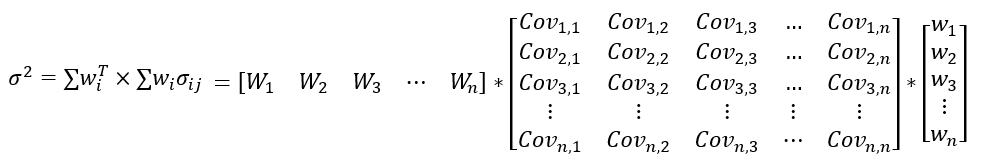

In [11]:
# Portfolio standard deviation, volatility (risk)
expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
expected_volatility.round(4)*100

33.12

In [12]:
# Calculate Sharpe ratio
sharpe_ratio = (expected_portfolio_return - risk_free)/expected_volatility
sharpe_ratio.round(2)

1.04

## 9.3 Define a Function to Obtain Metrics (2 steps)

In [13]:
def run_portfolio(weights, initial_investment, risk_free):
    # Perform asset allocation using the random weights (sent as arguments to the function)
    portfolio_df =  asset_allocation(Stock_Prices_df, initial_investment, weights)
  
    # Calculate the return on the investment 
    # Return on investment is calculated using the last final value of the portfolio compared to its initial value
    return_on_investment = ((portfolio_df['Total Value [$]'][-1:] - portfolio_df['Total Value [$]'][0]) / portfolio_df['Total Value [$]'][0]) * 100
  
    # Daily change of every stock in the portfolio
    portfolio_daily_return_df = portfolio_df.drop(columns = ['Total Value [$]', 'Daily Return [%]'])
    portfolio_daily_return_df = portfolio_daily_return_df.pct_change(1)
    portfolio_daily_return_df.replace(np.nan, 0, inplace = True) 
  
    # Portfolio Expected Return formula
    expected_portfolio_return = np.sum(weights * portfolio_daily_return_df.mean() ) * 252
  
    # Portfolio standard deviation, volatility (risk)
    covariance = portfolio_daily_return_df.cov() * 252 
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))

    # Calculate Sharpe ratio
    sharpe_ratio = (expected_portfolio_return - risk_free)/expected_volatility 
    return expected_portfolio_return, expected_volatility, sharpe_ratio, portfolio_df['Total Value [$]'][-1:].values[0], return_on_investment.values[0]

In [14]:
portfolio_metrics = run_portfolio(weights, initial_investment, risk_free)

In [15]:
print('Expected Portfolio Annual Return = {:.2f}%'.format(portfolio_metrics[0] * 100))
print('Portfolio Standard Deviation (Volatility) = {:.2f}%'.format(portfolio_metrics[1] * 100))
print('Sharpe Ratio = {:.2f}'.format(portfolio_metrics[2]))
print('Portfolio Final Value = ${:.2f}'.format(portfolio_metrics[3]))
print('Return on Investment = {:.2f}%'.format(portfolio_metrics[4]))

Expected Portfolio Annual Return = 38.51%
Portfolio Standard Deviation (Volatility) = 33.12%
Sharpe Ratio = 1.04
Portfolio Final Value = $5457048.49
Return on Investment = 445.70%


## 9.4 Define a Function for Asset Alocation and Obtain Metrics (1 Step)

In [16]:
#Include Asset_Allocation Function in run_portfolio
# The function returns: 
    # (0) Portfolio Data Frame 
    # (1) Expected portfolio return 
    # (2) Expected volatility 
    # (3) Sharpe ratio 
    # (4) Return on investment 
    # (5) Final portfolio value in dollars
    
def run_portfolio(df, weights, initial_investment, risk_free):
    ''' Performs an asset allocation and calc Portfolio Metrics'''
    # Perform asset allocation using the random weights (sent as arguments to the function)
    portfolio_df =  df.copy()
    # Scale stock prices using the "price_scaling"
    scaled_df = df.copy()
    for i in df.columns[0:]:
        scaled_df[i] = df[i]/df[i][0]
    #enumerate method links Stocks tickers in columns along with a counter position weight (i), like an index
    for i, stock in enumerate(scaled_df):
        portfolio_df[stock] = weights[i] * scaled_df[stock]  * initial_investment
    
    # Sum up all values and place the result in a new column titled "portfolio value [$]" 
    portfolio_df['Total Value [$]'] = portfolio_df.sum(axis = 1, numeric_only = True)
    
    # Calculate the portfolio percentage daily return and replace NaNs with zeros
    portfolio_df['Daily Return [%]'] = portfolio_df['Total Value [$]'].pct_change(1) * 100 
    portfolio_df.replace(np.nan, 0, inplace = True)
     
    # Calculate the return on the investment 
    # Return on investment is calculated using the last final value of the portfolio compared to its initial value
    return_on_investment = ((portfolio_df['Total Value [$]'][-1:] - portfolio_df['Total Value [$]'][0]) 
                            / portfolio_df['Total Value [$]'][0]) * 100
  
    # Daily change of every stock in the portfolio 
    portfolio_daily_return_df = portfolio_df.drop(columns = ['Total Value [$]', 'Daily Return [%]'])
    portfolio_daily_return_df = portfolio_daily_return_df.pct_change(1)
    portfolio_daily_return_df.replace(np.nan, 0, inplace = True)  
  
    # Portfolio Expected Return formula
    expected_portfolio_return = np.sum(weights * portfolio_daily_return_df.mean() ) * 252
  
    # Portfolio standard deviation, volatility (risk)
    covariance = portfolio_daily_return_df.cov() * 252 
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
    
    # Calculate Sharpe ratio
    sharpe_ratio = (expected_portfolio_return - risk_free)/expected_volatility 
    
    return portfolio_df, expected_portfolio_return, expected_volatility, sharpe_ratio, portfolio_df['Total Value [$]'][-1:].values[0], return_on_investment.values[0]

In [17]:
portfolio_metrics = run_portfolio(Stock_Prices_df, weights, initial_investment, risk_free)

In [18]:
print('Expected Portfolio Annual Return = {:.2f}%'.format(portfolio_metrics[1] * 100))
print('Portfolio Standard Deviation (Volatility) = {:.2f}%'.format(portfolio_metrics[2] * 100))
print('Sharpe Ratio = {:.2f}'.format(portfolio_metrics[3]))
print('Portfolio Final Value = ${:.2f}'.format(portfolio_metrics[4]))
print('Return on Investment = {:.2f}%'.format(portfolio_metrics[5]))

Expected Portfolio Annual Return = 38.51%
Portfolio Standard Deviation (Volatility) = 33.12%
Sharpe Ratio = 1.04
Portfolio Final Value = $5457048.49
Return on Investment = 445.70%
